<a href="https://colab.research.google.com/github/KoushaniBiswas/Neuromatch_academy_repo_by_Koushani/blob/master/W1D1_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#@title Figure Settings
import ipywidgets as widgets #interactive display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")


In [25]:
#@title Helper functions

#@markdown Most of the tutorials make use of helper functions
#@markdown to simplify the code that you need to write. They are defined here.

# Please don't edit these, or worry about understanding them now!

def restrict_spike_times(spike_times, interval):
  """Given a spike_time dataset, restrict to spikes within given interval.

  Args:
    spike_times (sequence of np.ndarray): List or array of arrays,
      each inner array has spike times for a single neuron.
    interval (tuple): Min, max time values; keep min <= t < max.

  Returns:
    np.ndarray: like `spike_times`, but only within `interval`
  """
  interval_spike_times = []
  for spikes in spike_times:
    interval_mask = (spikes >= interval[0]) & (spikes < interval[1])
    interval_spike_times.append(spikes[interval_mask])
  return np.array(interval_spike_times, object)

In [26]:
#@title Data retrieval
#@markdown This cell downloads the example dataset that we will use in this tutorial.
import io
import requests
r = requests.get('https://osf.io/sy5xt/download')
if r.status_code != 200:
  print('Failed to download data')
else:
  spike_times = np.load(io.BytesIO(r.content), allow_pickle=True)['spike_times']

In [27]:
type(spike_times) #to see what type of dataset are we dealing with

numpy.ndarray

In [28]:
spike_times.shape #what is the structure or dimension of the dataset

(734,)

In [29]:
#what is the first entry and the shape of the dataset
idx = 0
print(
    type(spike_times[idx]),
    spike_times[idx].shape,
    sep="\n"
)

<class 'numpy.ndarray'>
(826,)


In [30]:
idx = 321
print(
    type(spike_times[idx]),
    spike_times[idx].shape,
    sep="\n"   #separation between arguments
)

<class 'numpy.ndarray'>
(9723,)


In [31]:
#checking the numpy types and values in these arrays
i_neurons = [0, 321]
i_print = slice(0, 5) #specify how to slice a sequence

for i in i_neurons:
  print(
      "Neuron {}:".format(i),
      spike_times[i].dtype,
      spike_times[i][i_print],
      "\n",
      sep="\n"
  )

Neuron 0:
float32
[ 0.8149   14.822467 24.9646   25.1436   38.8709  ]


Neuron 321:
float32
[1.0698667 1.1536334 1.2403667 1.7072    1.799    ]




In [32]:
i_neurons = [0, 400]
i_print = slice(0, 5)

for i in i_neurons:
  print(
      "Neuron {}:".format(i),
      spike_times[i].dtype,
      spike_times[i][i_print],
      "\n",
      sep="\n"
  )

Neuron 0:
float32
[ 0.8149   14.822467 24.9646   25.1436   38.8709  ]


Neuron 400:
float32
[ 52.015007  53.420845  63.052254 102.8557   102.9709  ]




In [12]:
#in the above output float points to the precision of the data 
#here float32 resembles 32 bits of data
#spike_times is 1D its entries are numpy array anf its length is the number of neurons(734): by indexing , we selected a  subset of neurons
#an array in spike_times is also 1D and corresponds to a single neuron,its entries are a floating point number

In [33]:
#calculating and storing the number of neurons in thr datasets and the number of spikes per neuron
n_neurons = len(spike_times)
total_spikes_per_neuron = [len(spike_times_i) for spike_times_i in spike_times]
print(f"Number of neurons: {n_neurons}")
print(f"Number of spikes for first five neurons: {total_spikes_per_neuron[:5]}")

Number of neurons: 734
Number of spikes for first five neurons: [826, 2818, 3953, 646, 1115]


In [14]:
#counting and plotting total number of spikes
#plotting using a histogram - 
#question =are most neurons loud or quiet compared to the average?
#for the above question to be answered bins of constant width are defined
# in terms of total spikes and counts the neuron falling in each bin

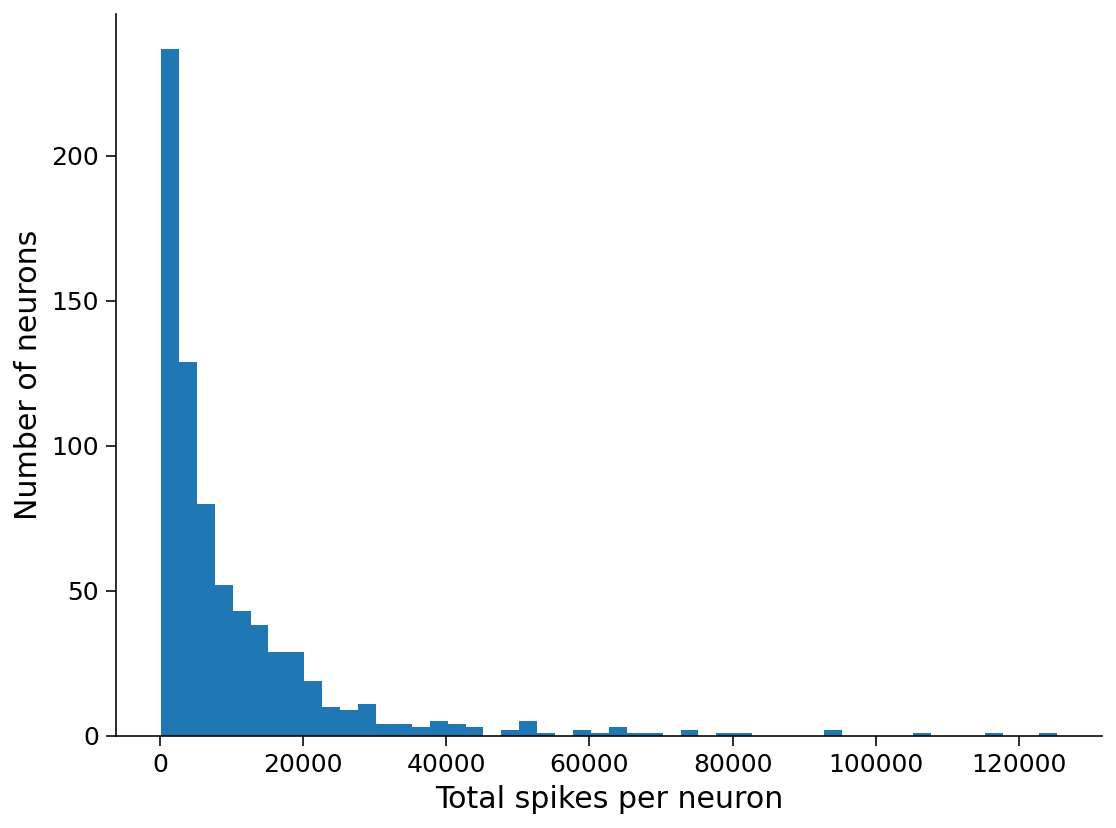

In [34]:

plt.hist(total_spikes_per_neuron, bins=50)
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons");

AttributeError: ignored

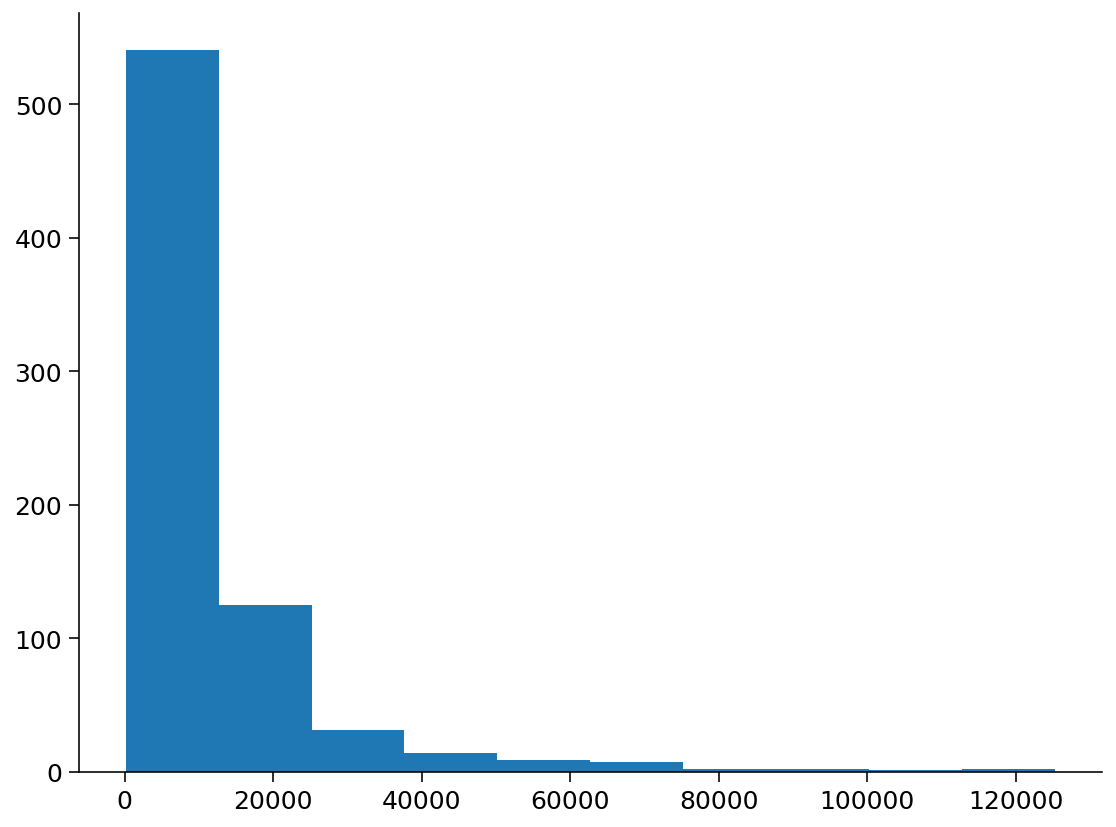

In [35]:
plt.hist(total_spikes_per_neuron, bin=40)
plt.xlabel("Total spikes per neuron")
plt.ylabel("Numberof neurons");

In [36]:
#to see the percentage of neuron having a below average spike count
mean_spike_count = np.mean(total_spikes_per_neuron)
frac_below_mean = (total_spikes_per_neuron < mean_spike_count).mean()
print(f"{frac_below_mean:2.1%} of neurons are below the mean")
#f means the formatted string literals 

68.0% of neurons are below the mean


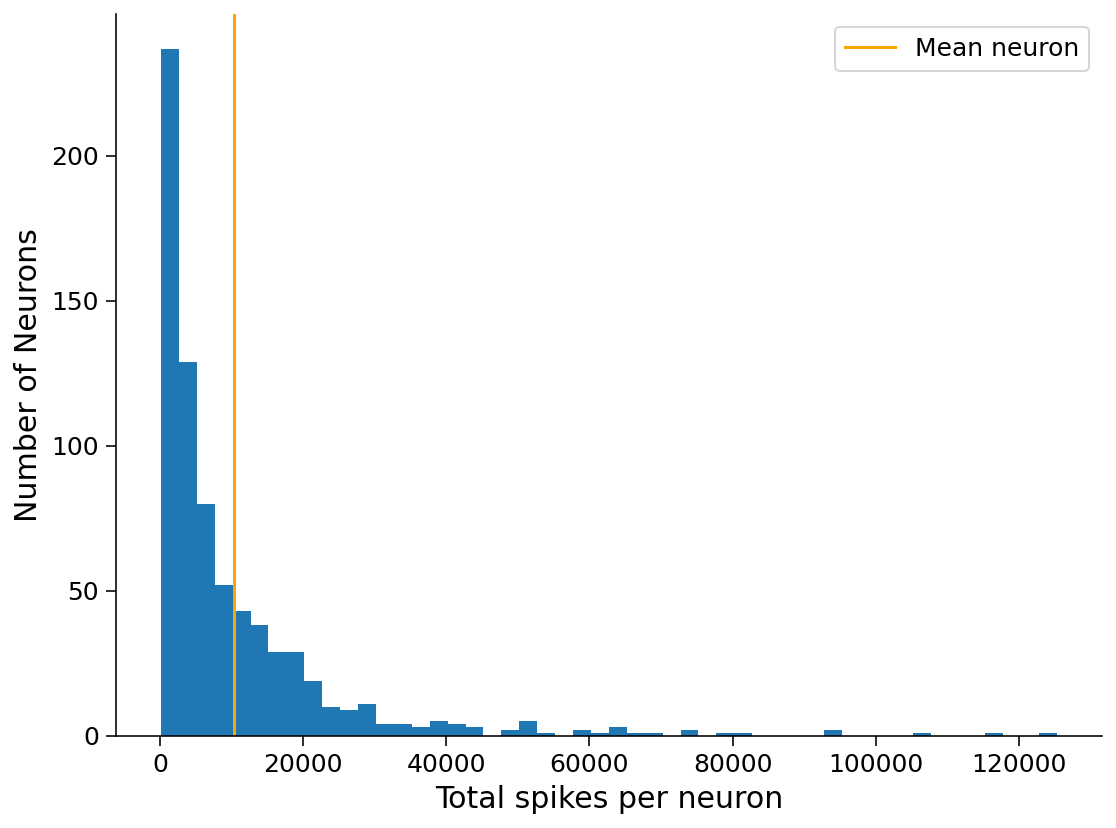

In [37]:
#adding the average spike count to the histogram plot:
plt.hist(total_spikes_per_neuron, bins=50)
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of Neurons")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.legend();

In [ ]:
#above histogram shows that most neurons are quite wrt the mean neuron


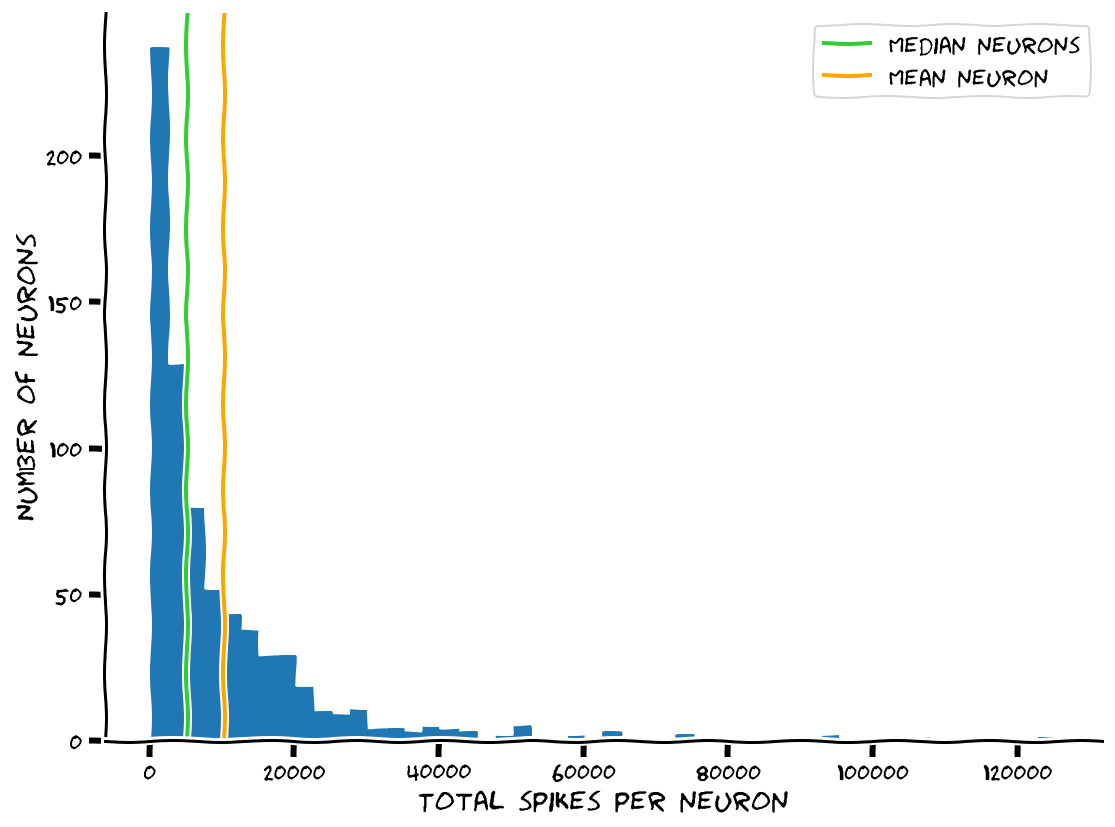

In [38]:
#comapring mean and median neurons
median_spike_count = np.median(total_spikes_per_neuron)
with plt.xkcd():
  
  plt.hist(total_spikes_per_neuron, bins=50, histtype="stepfilled")
  plt.axvline(median_spike_count, color="limegreen", label="Median neurons")
  plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
  plt.xlabel("Total spikes per neuron")
  plt.ylabel("Number of neurons")
  plt.legend()

In [ ]:
#visualising neuronal spiking activity
#getting subset of data

#new utility function used is restrict_spike_times

In [39]:
help(restrict_spike_times)

Help on function restrict_spike_times in module __main__:

restrict_spike_times(spike_times, interval)
    Given a spike_time dataset, restrict to spikes within given interval.
    
    Args:
      spike_times (sequence of np.ndarray): List or array of arrays,
        each inner array has spike times for a single neuron.
      interval (tuple): Min, max time values; keep min <= t < max.
    
    Returns:
      np.ndarray: like `spike_times`, but only within `interval`



In [40]:
#units are seconds after the recording starts
t_interval = (5, 15)
interval_spike_times = restrict_spike_times(spike_times, t_interval)

In [41]:
#what fraction of total spikes does fall into this interval
original_counts = sum([len(spikes) for spikes in spike_times])
interval_counts = sum([len(spikes) for spikes in interval_spike_times])
frac_interval_spikes = interval_counts / original_counts
print(f"{frac_interval_spikes:.2%} of total spikes are in the interval")

0.33% of total spikes are in the interval


In [ ]:
#how does the above value compare to the ratio between the interval duraiton and the experiment
#what fraction of the total time is in the interval
#approximating the duration by taking max and min spike time of the whole dataset
# to do the above task we concatenate all the neurons into one array and then use np.ptp
#to get difference between maximum and minimum value


In [42]:
spike_times_flat = np.concatenate(spike_times)
experiment_duration = np.ptp(spike_times_flat)
interval_duration = t_interval[1] - t_interval[0]

frac_interval_time = interval_duration / experiment_duration
print(f"{frac_interval_time:.2%} of the total time in the interval")

0.37% of the total time in the interval


In [ ]:
#above two result suggests that the average spike rate is not that different


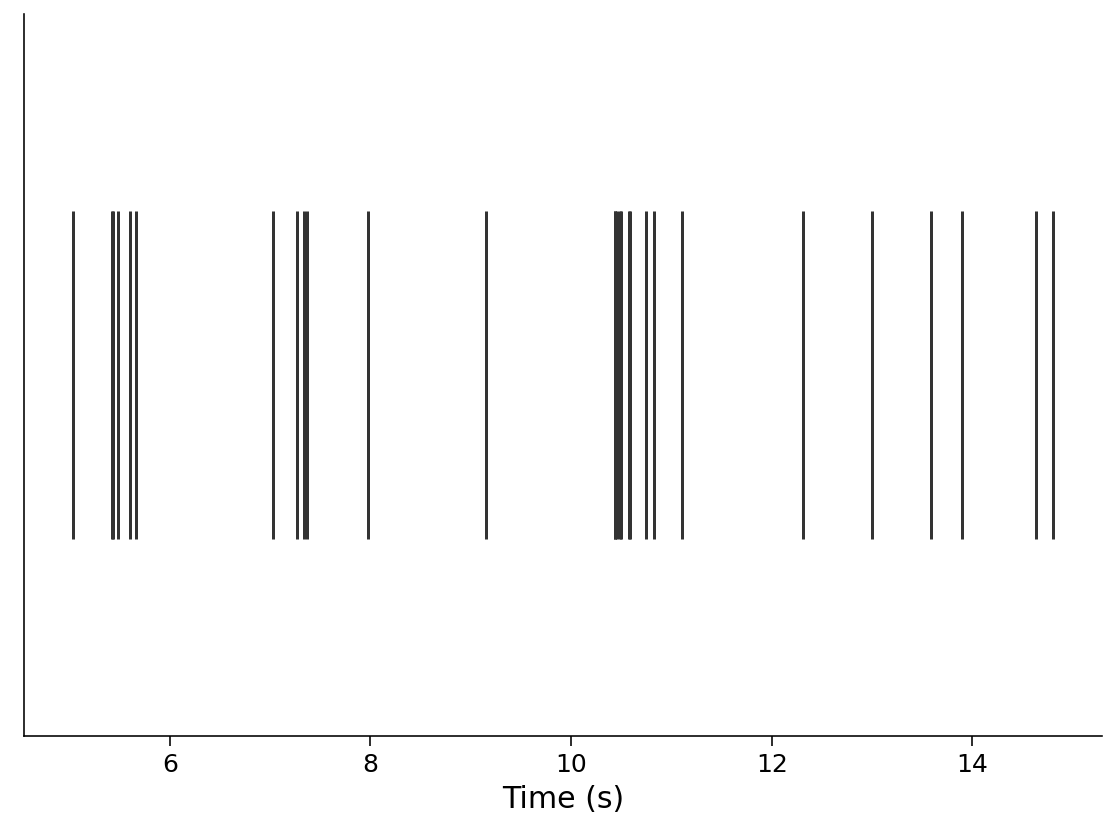

In [43]:
#plotting spiketrains and raster

neuron_idx = 1
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);  #to get tick location labels



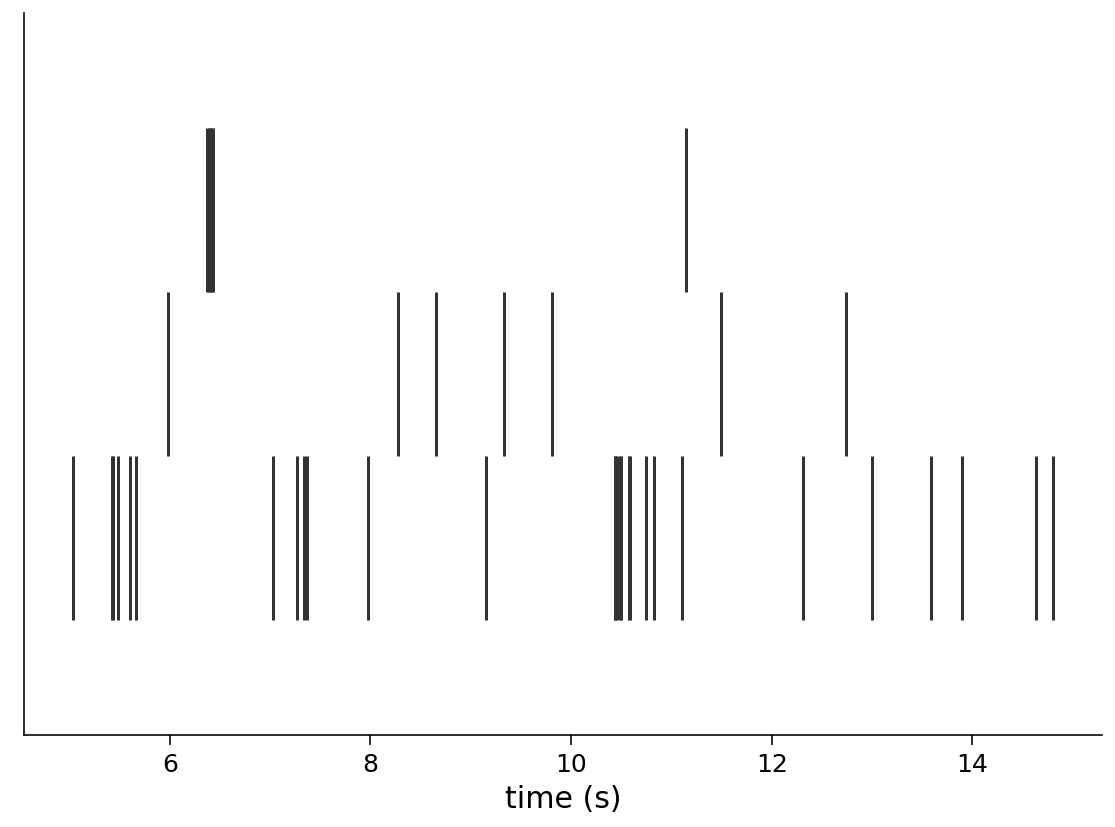

In [44]:
#plotting miultiple neurons

neuron_idx = [1, 11, 51]
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("time (s)")
plt.yticks([]);

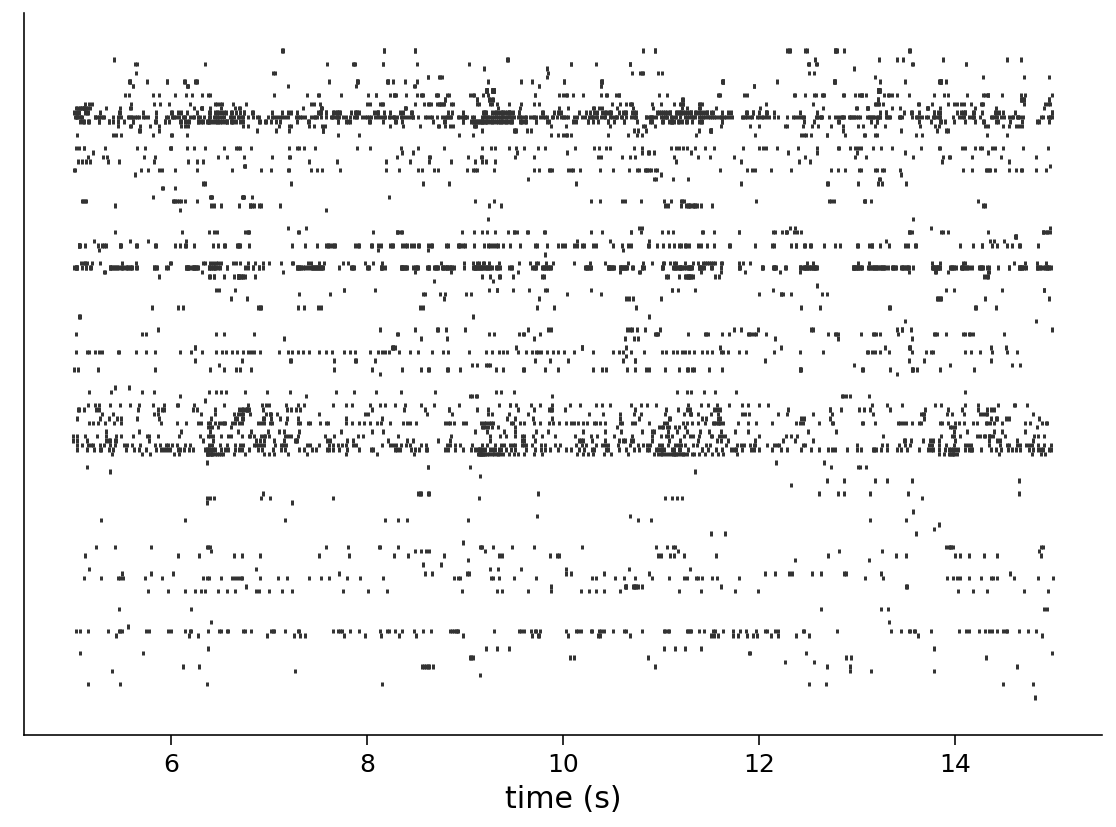

In [45]:
#to show every 5th neuron
neuron_idx = np.arange(0, len(spike_times), 5)
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("time (s)")
plt.yticks([]);

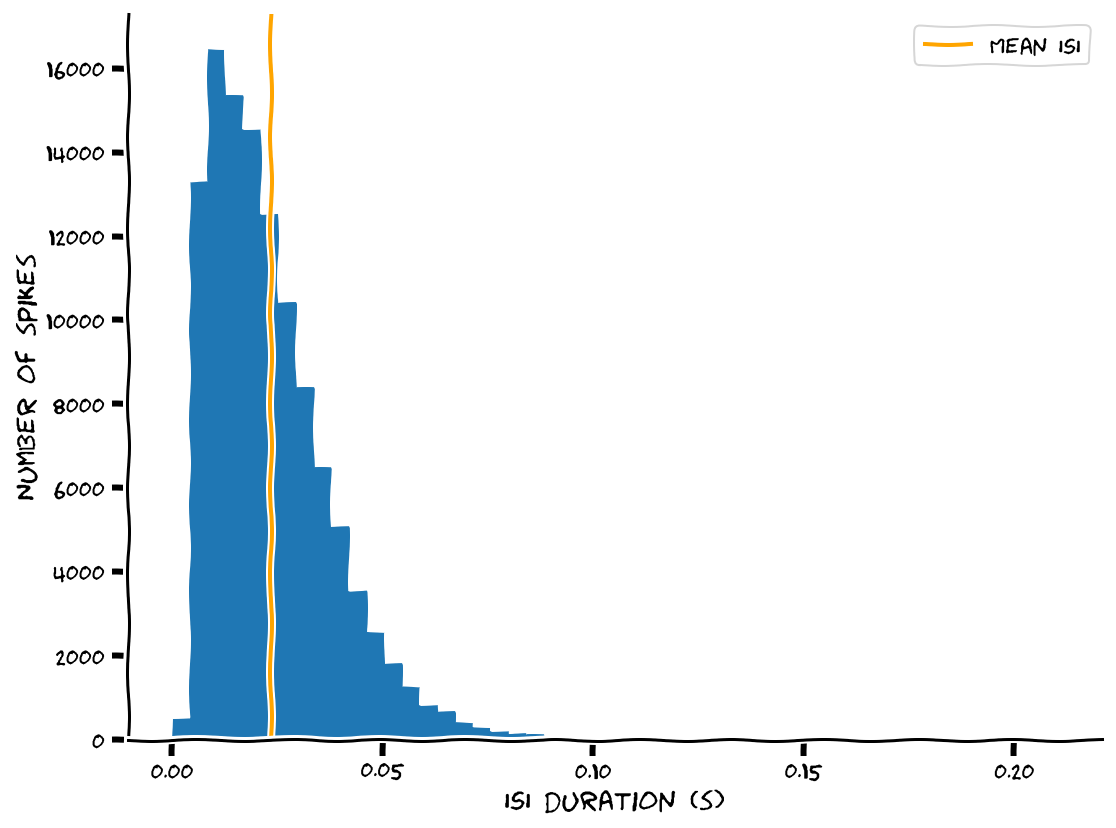

In [50]:
#numpy_arange returns an ndarray object containing evenly spaced values
#with a defined interval
def compute_single_neuron_isis(spike_times, neuron_idx):
  """Compute a vector of ISIs for a single neuron given spike times.
  Args:
    spike_times (list of 1D arrays): Spike time dataset, with the first
      dimension corresponding to different neurons.
    neuron_idx (int): Index of the unit to compute ISIs for.
  Returns:
    isis (1D array): Duration of time between each spike from one neuron.
  """
  # Extract the spike times for the specified neuron
  single_neuron_spikes = spike_times[neuron_idx]

  # Compute the ISIs for this set of spikes
  isis = np.diff(single_neuron_spikes)

  return isis

single_neuron_isis = compute_single_neuron_isis(spike_times, neuron_idx=283)

with plt.xkcd():
  plt.hist(single_neuron_isis, bins=50, histtype="stepfilled")
  plt.axvline(single_neuron_isis.mean(), color="orange", label="Mean ISI")
  plt.xlabel("ISI duration (s)")
  plt.ylabel("Number of spikes")
  plt.legend()


In [51]:
def exponential(xs, scale, rate, x0):
  """A simple parametrized exponential function, applied element wise
  Args:
    
    xs (np.ndarray or float): Input(s) to the function.
    scale(float): Linear sclaling factor.
    rate(float): exponential growth (positive) or decay (negative)
    x0(float): Horizontal offset.

  """
  ys = scale * np.exp(rate * (xs -x0))
  return ys

  def inverse(xs, scale, x0):
    """A simple parametrized inverse function ('1/x'), applied element wise

    Args:
    xs (np.ndarray or float): Input(s) to the function.
    scale (float): Linear scaling factor.
    x0 (float): Horizontal offset.

  """
  ys = scale / (xs - x0)
  return ys

def linear(xs, slope, y0):
  """A simple linear function, applied element-wise.

  Args:
    xs (np.ndarray or float): Input(s) to the function.
    slope (float): Slope of the line.
    y0 (float): y-intercept of the line.

  """
  ys = slope * xs + y0
  return ys